## DNA-Analyse

I dette dokumentet skal vi se litt nærmere på DNA, og hvordan vi kan bruke programmering som et verktøy til å analysere og jobbe med DNA-sekvenser. Vi kommer bare til å jobbe med mindre sekvenser som eksempler, men dette er gode eksempler på et viktig emne innenfor bioinformatikk, hvor man gjør analyser av hele det mennesklige *genomet*.

Notebooken er delt i to hovedbiter. I den første biten går vi igjennom og repeterer korte biter av hvordan DNA fungerer og er bygget opp. I tilegg skriver vi korte kodesnutter som utfører små analyseoppgaver av DNA-sekvenser.

I andre halvdel av denne notebooken går vi igjennom et bestemt case, som er basert på en forskningsartikkel fra 2008. I dettecases skal vi bruke et par av verktøyene vi har laget for å se på mutasjoner i genet for proteinet *insulin*, som kan føre til diabetes.

## Intro: Kort repetisjon om DNA

Deoksyribonukleinsyre (DNA) er et makromolekyl som utgjør arvematerialet til levende organismer. Molekylet er bygget opp som en lang dobbelttrådet spiralstruktur, som vist i bildet under. Mellom de to trådene ligger det *nukleotider*, DNA-ets byggestener. Disse nukleotidene ligger i jevn avstand mellom de to trådene, som trinnene i en stige. Hver nukleotid er bygget opp av ulike baser koblet til en sukker og en fosfatgruppe. Det er fire ulike baser som kan inngå i et nukleotid:
* Adenin (A)
* Tyamin (T)
* Guanin (G)
* Cytosin (C)
basepar i jevn avstand, som trinnene i en stige. Det er disse baseparene som er selve informasjonen lagret i DNA-molekylet.

Disse forekommer alltid i komplementære par av A-T og G-C. Om det for eksempel er en adenin base langs den ene tråden, så vil det være en parvis tyamin på nabotråden. De to trådene i DNA inneholder altså eksakte kopier av den samme informasjonen. Dette er viktig for DNA-maskineret som vedlikeholder og kopierer DNA.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4c/DNA_Structure%2BKey%2BLabelled.pn_NoBB.png" width=500>

Som nevnt er informasjonen i DNA lagret i rekkefølgen av nukleotider, eller baser, og man kan derfor se på DNA som en *sekvens* av bokstavene A/T/G/C. Man trenger kun å spesifisere basene langs en av DNA-ets tråder, ettersom at de to er kopier av hverandre. Et eksempel på en DNA-sekvens vil derfor være som føler

In [1]:
sekvens = "ACTGATTGACCGCGAGTAG"

Denne informasjonen har vi skrevet inn som en *tekststreng* i Python. Når vi gjør det kan vi bruke programmering til å manipulere sekvensen. Dette skal vi se på snart.

### Det mennesklige genomet

Mennesker har stort sett det samme arvematerialer, med kun små forskjeller. Studier viser at omtrent 0.1% av det totale DNA-et skiller seg fra person til person. Stort sett deler vi altså det samme arvematerialet, og som helhet kaller vi dette for det *mennesklige genomet*.

Menneskets arvemateriale er fordelt over 23 ulike kromosomer. Vi er også diploide, som betyr at vi i hver celle har to versjoner av hvert kromosom, som godt kan være litt forskjellige.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Human_male_karyotpe_high_resolution_-_Chromosome_1.png" width=600>
<center> Menneskets 23 kromosompar sett igjennom et mikroskop.  
    Kilde: <a href="https://en.wikipedia.org/wiki/Chromosome_1#/media/File:Human_male_karyotpe_high_resolution_-_Chromosome_1.png">Wikimedia Commons</a> (Public Domain)<b></b></center>
    
Det mennesklige genomet består av litt i overkant av 3.2 milliarder basepar, så siden vi er diploide har vi hver celle altså omtrent 6.4 milliarder basepar.

La oss gjøre en kjapp beregning av hvor mye informasjon som er lagret i det mennesklige genom. Ettersom at kromosonparene inneholder omtrent den samme informasjonen trenger vi bare å ta hensyns til 3.2 milliarder basepar. Men hvordan regner man på "hvor mye informasjon" noe inneholder? Sett på en annen måte er dette det samme som å spørre hvor mye lagringsplass man trenger for å lagre hele det mennesklige genomet på en datamaskin.

På en datamaskin lagres all informasjon i totallsystemet, altså lagres all informasjon som en lang rekke med 0 og 1. Hvert siffer kalles 1 *bit*. Hvor mange bits trenger vi for å lagre en DNA-sekvens? For hver base er det fire muligheter: A, T, C og G. Hvor mange bits trenger vi for å entydig representere disse? Fra kombinatorikk vet vi at dette blir 2 bits, fordi $2^2 = 4$. For eksempel kan vi si at vi bruker følgende "oversettelse":
* A - 00
* T - 01
* G - 10
* C - 11

Altså vil hvert basepar trenge 2 bits. Ettersom at det mennesklige genomet består av 3.2 milliarder basepar har vi da
Vi trenger altså 
$$3.2\cdot 10^9 {\rm\ basepar} \cdot 2 \frac{\rm bits}{\rm basepar} = 6.4\cdot10^9 {\rm\ bits}.$$
Men hvor mye er egentlig 6.4 milliarder bits? De fleste har nok et bedre forhold til *bytes*, og en byte er 8 bits. Så da får vi at dette svarer til
$$\frac{6.4\cdot10^9 {\rm\ bits}}{8 \frac{\rm bits}{\rm byte}} = 0.8 \cdot 10^{9} {\rm\ bytes} = 0.8 {\rm\ gigabyte}.$$

Altså er hele det mennesklige genomet omtrent 0.8 gigabyte. Dette er ganske mye, men samtidig overraskende lite, det mindre enn en liten stor app eller en film lagret i HD-kvalitet.

### DNA-Sekvensiering

Om vi ønsker å utforske informasjonen som er lagret i arvemateriale må vi på en eller annen måte kunne lese ut sekvensen av basepar i DNA-et. Denne prosessen kalles *sekvensiering*. De første DNA-sekvensene ble funnet på 1970-tallet, men stor-skala DNA-sekvensiering er kun blitt nylig i moderne tid. I 1990 startet [Human Genome Project](https://en.wikipedia.org/wiki/Human_Genome_Project), et storskala vitenskapelig prosjekt for å kartlegge hele det mennesklige genomet. Prosjektet fullførte oppgaven sin i 2003.

Vi skal ikke si så mye om hvordan sekvensiering er teknologisk mulig, det er et interessant tema, men det får vi ta en annen gang. For nå holder vi oss til å påpeke at rask sekvensiering av DNA er et teknologisk gjennombrudd som har ført til store nye datamengder og et nytt felt innen biologien: bioinformatikken. Dette feltet handler om å kombinere eksperimentelle metoder og teknologi for å hente inn store mengder informasjon, blant annet fra DNA, og å bruke verktøy fra matematikk og informatikk for å analysere og tolke denne informasjonen. 

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5a/Chromatogram.jpg" width=700>
<center>Eksempel på eksperimentell sekvensiering av DNA. Kilde: <a href="https://en.wikipedia.org/wiki/Electropherogram#/media/File:Chromatogram.jpg">Wikimedia Commons</a> (Public Domain).</center>



<img src="https://upload.wikimedia.org/wikipedia/commons/8/88/DNA-Sequencers_from_Flickr_57080968.jpg" width=500>
<center>Moderne sekvensieringsmaskiner kan sekvensiere utrolige mengder DNA på kort tid.<a href="https://en.wikipedia.org/wiki/DNA_sequencer#/media/File:DNA-Sequencers_from_Flickr_57080968.jpg">Kilde: Wikimedia Commons</a> (<a href="https://creativecommons.org/licenses/by/2.0/">CC BY 2.0</a>)</center>

## Jobbe med DNA-sekvenser i Python

Nå har vi kort snakket litt om DNA, men la oss snu over til å begynne å analysere og manipulere DNA-sekvenser ved hjelp av programmeringsspråket Python. Vi starter med å jobbe med helt oppdiktete sekvenser, men vi skal til slutt se på et case med ekte DNA-sekvenser knyttet til diabetes.

Vi går igjennom et par ulike oppgaver. Om du ønsker å se oppgavene på en annen måte, eller å lære enda mer om bioinformatikk kan du finne flere oppgaver på [rosalind.info](http://rosalind.info/problems/list-view/).


### Telle baser

Den første oppgaven vi skal løse er å telle hvor mange ganger de fire ulike basene forekommer i en gitt DNA-streng. Om vi blir gitt en DNA-streng som en tekststreng i Python, så kan vi løkke over den ved hjelp av en for-løkke:

In [2]:
dna_sekvens = "ACTGATTGAAG"

for base in dna_sekvens:
    print(base)

A
C
T
G
A
T
T
G
A
A
G


Inne i løkka kan vi nå gjøre mer spennende ting enn å bare skrive ut basen. Vi lager nå en funksjon som for en vilkårlig DNA sekvens løkker over den og teller de ulike basene:

In [3]:
def tell_baser(DNA_sekvens):
    """Gitt en DNA sekvens, tell antallet av de 4 ulike basene."""
    A = 0
    C = 0
    G = 0
    T = 0
    
    for base in DNA_sekvens:
        if base =='A':
            A += 1
        elif base == 'C':
            C +=1
        elif base == 'G':
            G += 1
        elif base == 'T':
            T += 1
        else:
            print("Ugyldig base funnet i DNA-sekvens")
    
    N = len(DNA_sekvens)
    
    print(f"Baser totalt:     {N}")
    print(f"----------------------------")
    print(f"Antall (A)denin:  {A:2} ({A/N:.1%})")
    print(f"Antall (C)ytosin: {C:2} ({C/N:.1%})")
    print(f"Antall (G)uanin:  {G:2} ({G/N:.1%})")
    print(f"Antall (T)ymin:   {T:2} ({T/N:.1%})")
    print(f"----------------------------")

In [4]:
DNA_sekvens = "GCGAGGTTTAATAATTGGCGTGCCTTGAAGGTTAAAGCCC"
tell_baser(DNA_sekvens)

Baser totalt:     40
----------------------------
Antall (A)denin:  10 (25.0%)
Antall (C)ytosin:  7 (17.5%)
Antall (G)uanin:  12 (30.0%)
Antall (T)ymin:   11 (27.5%)
----------------------------


### Oppgave 1a) Telle baser

* Kjør koden over
* Diskuter koden med sidemannen og forklar hva de ulike bitene av koden gjør.

## Komplementere en DNA-sekvens

DNA er dobbeltrådet, der informasjonen langs den ene tråden er en *komplementær* kopi av informasjonen langs den andre tråden. At det er en *komplementær* kopi betyr at vi ikke finner de eksakt samme basene, men de "motsatte" basene, det vil si at hver A langs en tråd har en T i den andre tråden, og vica versa. Det samme gjelder G og C.

De to trådene i DNA kalles gjerne for kodestrand og malstrand, eller på engelsk: coding strand/template strand. Kodestranden er den som koder for faktiske gener. Når DNA skal kopieres over til mRNA for fraktes ut av cellekjernen er det derimot maltråden som brukes. Situasjonen oppsummeres av bildet under:

<img src="https://cdn.kastatic.org/ka-perseus-images/1da89713b9aa8067742244d916749e72561bb3cc.png" width=700>
<center>Bildet er tatt fra <a href="https://www.khanacademy.org/science/biology/gene-expression-central-dogma/transcription-of-dna-into-rna/a/overview-of-transcription">Khan Academy</a>.</center>

### Oppgave 1b) Komplementere en DNA-sekvens

Du skal nå lage en funksjon som gitt en DNA-sekvens, finner den komplementære sekvensen. Men andre ord, returner en ny streng der følgende endringer er gjort:
* A $\rightarrow$ T
* T $\rightarrow$ A
* G $\rightarrow$ C
* C $\rightarrow$ G

For å få til dette, fyll inn koden under. For hver base må du bruke en if-test (som i eksempelet over) og legge til en ny bokstav i den komplementære strengen, her kan du bruke `+=` for eksempel.

In [5]:
def komplementer_DNA(sekvens):
    """Gitt en DNA sekvens, finn den komplementær sekvensen"""
    komplement = ""
    for base in sekvens:
        ...
        
    return komplement

In [6]:
def komplementer_DNA(sekvens):
    """Gitt en DNA sekvens, finn den komplementær sekvensen"""
    komplement = ""
    
    for base in sekvens:
        if base =='A':
            komplement += "T"
        elif base == 'C':
            komplement += "G"
        elif base == 'G':
            komplement += "C"
        elif base == 'T':
            komplement += "A"
        else:
            print("Ugyldig base funnet i DNA-sekvens")
            
    return komplement

Test koden din på strengen under:

In [7]:
kodetråd = "GTTTAATAATTGGCGTGCCTTGAAGGTTAAAGCCC"
maltråd = komplementer_DNA(kodetråd)

print(kodetråd)
print(maltråd)

GTTTAATAATTGGCGTGCCTTGAAGGTTAAAGCCC
CAAATTATTAACCGCACGGAACTTCCAATTTCGGG


# Fra DNA til protein: Transkripsjon og Translasjon

Arvematerialer i DNA koder for ulike proteiner. Den delen av DNA som koder for ett git protein kalles et *gen*. Vi skal nå se nærmere på prosessen på hvordan vi går fra et gen, altså en DNA-sekvens, til et protein. Denne prosessen deles gjerne i to:
1. Først kopieres den relevante biten av DNA-et over til en bit med mRNA som kan transportes ut av cellekjernen og til ribosomene. Dette kalles gjerne for *transkripsjon*.
2. Deretter oversettes mRNA-sekvensen til et polypeptid ved at RNA-sekvensen oversettes til aminosyrer som settes sammen som perler på en snor. Dette kalles gjerne for *translasjon*.


<img src="https://cdn.kastatic.org/ka-perseus-images/20ce29384b2e7ff0cdea72acaa5b1dbd7287ab00.png" width=700>
<center>Bildet er tatt fra <a href="https://www.khanacademy.org/science/biology/gene-expression-central-dogma/transcription-of-dna-into-rna/a/overview-of-transcription">Khan Academy</a></center>

Vi skal nå skrive kode som utfører disse to stegene.

### Transkripsjon

Første steg handler om å lage en mRNA-kopi av en gitt DNA-sekvens. mRNA ligner veldig på DNA, men er enkeltrådet, istedenfor dobbeltrådet. I tilegg har den også basen uracil, istedenfor tyamin.

Det er enzymet RNA polymerase som har som oppgave å kopiere over informasjon i DNA til RNA. Den vil gjøre dette fra DNAets maltråd, derav "mal". 

### Oppgave 1c) Transkripsjon

Lag en funksjon som finner mRNA-sekvensen til et gen, gitt DNA-sekvensen langs maltråden. Hint: Denne funksjonen vil ligne ganske mye på svaret fra (1b).

In [8]:
def transkripsjon(DNA_sekvens):
    """Gitt en DNA sekvens fra en malstrand, finn mRNA-sekvens gjennom transkripsjon"""
    mRNA = ""
    for base in DNA_sekvens:
        ...
    return mRNA

In [9]:
def transkripsjon(DNA_sekvens):
    """Gitt en DNA sekvens fra en malstrand, finn mRNA-sekvens gjennom transkripsjon"""
    mRNA = ""
    for base in DNA_sekvens:
        if base =='A':
            mRNA += "U"
        elif base == 'C':
            mRNA += "G"
        elif base == 'G':
            mRNA += "C"
        elif base == 'T':
            mRNA += "A"
        else:
            print("Ugyldig base funnet i DNA-sekvens")
            
    return mRNA

Når man har sekvensiert DNA er det vanlig å oppgi en DNA-sekvens slik den ser ut langs kodestranden. Forklar hvilke steg du må gjøre om du skal oversette en slik sekvens til mRNA med funksjonene du har skrevet så langt.

### Translasjon

Translasjon av mRNA til et polypeptid skjer i ribosomene. Her vil tre og tre basepar i mRNA-et utgjøre et *kodon*, som skoder for en gitt aminosyre. Ett tRNA-molekyl vil gjenkjenne dette kodonet og gjøre jobben med å koble riktig aminosyre på polypeptidet.

Ettersom at det er 4 ulike baser, og 3 baser utgjør et koden, finnes det $4^3 = 64,$ ulike kodon. Derimot består proteiner som menneskroppen lager kun av 20 ulike aminosyrer. Det er altså ulike kombinasjoner av basepar som koder for samme aminosyre. Ettersom at det bare er 20 aminosyrer er det standardisert å beskrive hver aminosyre med en gitt bokstav.

Vi ønsker nå å oversette mRNA-sekvensen vår til en sekvens av aminosyrer. Da må vi først finne en kodon-tabell, som viser oss hva de ulike kodonene svarer til. Det kan du for eksempel slå opp på wikipedia:
* https://en.wikipedia.org/wiki/Genetic_code#RNA_codon_table

Alternativt har Rosalind.info en som er lettere å kopiere her:
* http://rosalind.info/glossary/rna-codon-table/

Vi har tatt jobben med å kopiere over hele kodontabellen til Pythonkode her:

In [10]:
kodontabell = {
    "UUU":"F", "UUC":"F", "UUA":"L", "UUG":"L",
    "UCU":"S", "UCC":"S", "UCA":"S", "UCG":"S",
    "UAU":"Y", "UAC":"Y", "UAA":"Stop", "UAG":"Stop",
    "UGU":"C", "UGC":"C", "UGA":"Stop", "UGG":"W",
    "CUU":"L", "CUC":"L", "CUA":"L", "CUG":"L",
    "CCU":"P", "CCC":"P", "CCA":"P", "CCG":"P",
    "CAU":"H", "CAC":"H", "CAA":"Q", "CAG":"Q",
    "CGU":"R", "CGC":"R", "CGA":"R", "CGG":"R",
    "AUU":"I", "AUC":"I", "AUA":"I", "AUG":"M",
    "ACU":"T", "ACC":"T", "ACA":"T", "ACG":"T",
    "AAU":"N", "AAC":"N", "AAA":"K", "AAG":"K",
    "AGU":"S", "AGC":"S", "AGA":"R", "AGG":"R",
    "GUU":"V", "GUC":"V", "GUA":"V", "GUG":"V",
    "GCU":"A", "GCC":"A", "GCA":"A", "GCG":"A",
    "GAU":"D", "GAC":"D", "GAA":"E", "GAG":"E",
    "GGU":"G", "GGC":"G", "GGA":"G", "GGG":"G",}

Dette er et spesielt Python-objekt som kalles en *dictionary* (ordbok). Den fungerer ved at vi har par som hører sammen, slik at vi kan skrive for eksempel: `kodontabell['AAG']`, og da får vi ut aminosyren K.

### Oppgave 1d) Translasjon av mRNA

Koden under løkker igjennom mRNA tråden og slår sammen hver tredje base til et koden. Fyll inn koden så vi bygger opp en sekvens av aminosyrer

In [11]:
def translasjon(mRNA):
    """Oversett en mRNA sekvens til en sekvens av aminosyrer"""
    polypeptid = ""
    
    for k in range(0, len(mRNA), 3):
        kodon = mRNA[k:k+3]
        polypeptid += ...
        
    return polypeptid

In [12]:
def translasjon(mRNA):
    """Oversett en mRNA sekvens til en sekvens av aminosyrer"""
    polypeptid = ""
    
    for k in range(0, len(mRNA), 3):
        kodon = mRNA[k:k+3]
        polypeptid += kodontabell[kodon]
        
    return polypeptid

### Oppgave 1e)

* Forklar hvordan vi nå kan utføre hele prosessen fra en DNA-sekvens oppgitt fra kodestranden, til et polypeptid av aminosyrer
* Test med DNA-sekvensen `ATCGGTACGGCATTG`. Dette skal bli polypeptidet: `IGTAL`.

In [13]:
kodetråd = "ATCGGTACGGCATTG"
maltråd = komplementer_DNA(kodetråd)
mRNA = transkripsjon(maltråd)
polypeptid = translasjon(mRNA)
print(polypeptid)

IGTAL


## Sammenligne sekvenser og identifisere Mutasjoner

Så langt har vi sett kort på hvordan vi går fra en DNA-sekvens til et polypetid. La oss nå se hvordan vi kan sammenligne ulike DNA-sekvenser for å finne forskjeller. Slike forskjeller kommer fra mutasjoner, som er punktendringer i DNA-sekvensen.

### Finne antall forskjeller

Det først vi ser på er å sammenligne to sekvenser og finne *antall* forskjeller eller mutasjoner. På fagspråket kalles dette for *Hamming-avstanden* mellom to sekvenser. Hamming avstanden er rett og slett antall karakterer som er forskjellig mellom to strenger.

### Oppgave 1f) Hamming-avstanden

Gitt to sekvenser, `t` og `s`. Lag en funksjon som returnerer antall karakterer som er ulike. Dette kan altså enten være antall baser som er forskjellig, eller antall aminosyrer. For å løkke over to baser samtidig kan vi bruke funksjonen `zip`:

In [14]:
def hamming(t, s):
    """Finn antall ulikheter mellom to sekvenser"""
    ...
    
    for base1, base2 in zip(t, s):
        if base1 != base2:
            ...
        
    return ...

In [15]:
def hamming(t, s):
    """Finn antall ulikheter mellom to sekvenser"""
    antall_ulikheter = 0
    
    for base1, base2 in zip(t, s):
        if base1 != base2:
            antall_ulikheter += 1
        
    return antall_ulikheter

Sjekk funksjonen din ved å sammenligne sekvensene: `ATCGC` og `ACTGC` for hånd og med kode:

In [16]:
antall_ulikheter = hamming('ATCGC', 'ACTGC')
print(f"De to strengene har {antall_ulikheter} ulikheter")

De to strengene har 2 ulikheter


### Oppgave 1g) Identifisere mutasjoner

Om vi sammenligner to sekvenser og finner ut av de er ulike, så kan det ofte være vanskelig å finne nøyaktig *hvor* der ulike. La oss derfor også skrive en funksjon som gjør dette lettere. 

Det finnes mange måter vi kan gjøre dette på, men la oss gå for en enkel løsning. La oss lage en ny streng om innholdet i de to input-strengene er lik, så legger vi inn en `-`. Om innholder er forskjellig legger vi inn en `+`. Vi kan da skrive ut denne nye strengen under de to andre, så kan vi enklet se hvor i strengen de er ulike.

For eksempel kan vi gjøre som følger:
```
t = "ACGTGCACATGAGATCTGATTAGACAGGAGACCAGATATACAGATATATGATACAGATACGATA"
s = "ACGTGCACATGAGATCTGATTAGACAGCAGACCAGATATACAGATATATGATACAGATACGATA"

print(t)
print(s)
print(finn_forskjeller(t, s))
```
og få ut:
```
ACGTGCACATGAGATCTGATTAGACAGGAGACCAGATATACAGATATATGATACAGATACGATA
ACGTGCACATGAGATCTGATTAGACAGCAGACCAGATATACAGATATATGATACAGATACGATA
---------------------------+------------------------------------
```

Fyll inn koden under så funksjonen virker som dette. Test at koden fungerer som den skal

In [17]:
def finn_forskjeller(s, t):
    """Gitt to strenger, s og t, finn forskjellene mellom dem."""
    ...

In [18]:
def finn_forskjeller(s, t):
    """Gitt to strenger, s og t, finn forskjellene mellom dem."""
    markør = ""
    for base1, base2 in zip(s, t):
        if base1 == base2:
            markør += "-"
        else:
            markør += "+"
    return markør

In [19]:
t = "ACGTGCACATGAGATCTGATTAGACAGGAGACCAGATATACAGATATATGATACAGATACGATA"
s = "ACGTGCACATGAGATCTGATTAGACAGCAGACCAGATATACAGATATATGATACAGATACGATA"

print(t)
print(s)
print(finn_forskjeller(t, s))

ACGTGCACATGAGATCTGATTAGACAGGAGACCAGATATACAGATATATGATACAGATACGATA
ACGTGCACATGAGATCTGATTAGACAGCAGACCAGATATACAGATATATGATACAGATACGATA
---------------------------+------------------------------------


# 2) Case: Gener, Insulin og Diabetes

Vi skal nå ta for oss et case som handler om gener, mutasjoner og diabetes. Her kan vi se hvordan noen av de verktøyene vi laget over kan hjelpe oss å forstå en genetisk studie som ble gjennomført i 2008.  Opplegget er inspirert av http://education.expasy.org/bioinformatique/Diabetes.html, hvor mer informasjon også kan finnes. 

Diabetes er sykdom som fører til abnormalt høye nivåer av blodsukker som et resultat av at kroppen ikke klarer å produsere, eller benytte seg av, insulin. Diabetes som sykdom kan være forersaket av mange ulike faktorer, og som oftest tenker man at diabetes er delvis genetisk, og delvis miljøpåvirket. Merk spesielt at diabetes er en *type* sykdom, og forskjellige mennesker kan ha veldige forskjellige former for diabetes.

I denne caseoppgaven skal vi se på en sjeldnere form for diabetes som kalles *monogen diabetes*. Navnet *monogen* refererer til at dette formen for diabetes er forårsaket av punktmutasjoner til ett enkelt gen (mono=én/ett). I monogenisk diabetes deler man gjerne videre opp i to grupper, de som blir diagnostisert med diabetes som nyfødte (nyfødtdiabetes), og de som utvikler det senere i livet, gjerne iløpet av ungdomsårene (MODY diabetes).

Monogen diabetes er som nevnt forårsaket på grunn av mutasjoner til ett enkelt gen, men for forskjellige mennesker kan det være mutasjoner til forskjellige gener. Ettersom at diabetes er en sykdom forårsaket av unormalt insulin, skulle man kanskje tro at genet for insulin var det vanligste genet i monogen diabetes, men slik er det ikke. Ifølge diabetesforbundet er det til nå 13 kjente ulike former for MODY, som kommer av mutasjoner til 5 ulike gener:
* CSK-genet
* HNF1A-genet
* HNF1B-genet
* HNF4A-genet
* INS-genet

Her er det sistnevnte genet, INS, genet for insulin. Derimot er monogen MODY diabetes ofte forårsaket av mutasjonen til de to første genene

Vi skal nå se på en forskningsstudie fra 2008. På dette tidspunktet var det kjente tilfeller av nyfødtdiabetes grunnet mutasjoner i INS-genet, men ikke tilfeller av MODY. Forskningsgruppen som gjennomførte studien hadde en hypotese om at det også måtte finnes tilfeller av MODY som var grunnet INS-mutasjoner, og forsket derfor på dette.

I studien gikk forskerne DNA for INS-genet fra en rekke pasienter med MODY for å finne mulige mutasjoner. Blant annet jobbe de seg igjennom en norsk database for diabetes blant barn. De klarte til slutt å finne to ulike former for slike mutasjoner. Vi skal nå se på ett av disse to tilfellene. 

Vi har lagt ved den originale forskningsartikkelen sammen med opplegget, men merk at dette er en fagartikkel, og er derfor ikke så veldig lett å lese eller forstå seg på. Vi legger den ved så man kan få et forhold til hvordan forskningsartikler ser ut.

### Familien

I det ene tilfellet hvor de oppdaget en ny form for monogenisk diabetes har vi DNA-sekvensiering av INS-genet fra 8 ulike personer i samme slekt. De 8 personene og deres plass i slektstreet ser ut som følger:

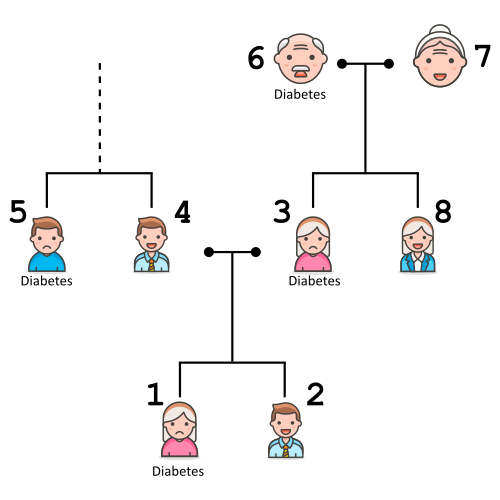

Av de 8 personene har 4 blitt diagonstisert med diabetes. Person 5 og 6 har diabetes type 2, som de ble diagnostisert med ved henholdsvis ved 50 og 40 års alder. Person 1 og 3 ble derimot diagonstisert i ungdomsårene, ved hhv alder av 10 og 13 år. Vi skal nå se nærmere på DNA-et til disse menneskene og se hva vi kan finne.

### Villtypen

Ettersom at mennesker deler 99.9% av DNA-et sitt har de aller fleste en identisk kopi av INS-genet. Denne "vanlige" allele forekomsten kalles gjerne for *villtypen* til INS-genet ("wildtype" på engelsk). Men noen har altså et INS-gen der det forekommer ulikheter fra villtypen.

Vi kommer her ikke til å se på *hele* INS-genet, fordi det er ganske stort, men vi velger oss en liten bit av den, nemlig sekvensen:

In [20]:
villtype = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"

### Oppgave 2a) Hvilket kromosom ligger INS-genet på?

Før vi begynner å se på mutasjonene våres, kan vi jo finne ut litt mer om INS-genet, for eksempel hvilket kromosom det ligger på. For å gjøre dette kan vi søke etter villtype sekvensen i det mennesklige Genomet. Dette finnes det flere verktøy for å gjøre, for eksempel denne nettsiden:
* http://genome.ucsc.edu/cgi-bin/hgBlat

Gå inn på siden, lim inn INS-gen sekvensen vi har gitt og gjør et søk. Hvilket kromosom ligger INS-genet på?

Når vi limer inn villtypen i BLAT-søket finner vi følgende resultat:
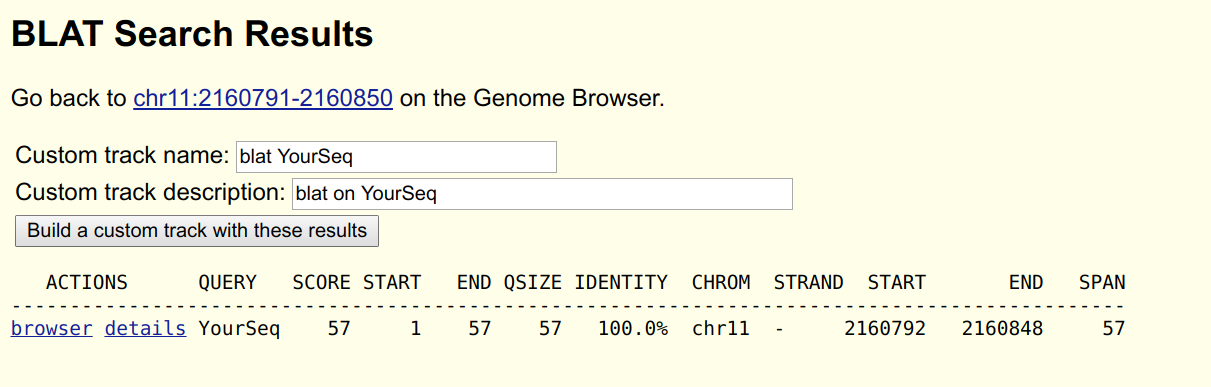

Der står det at INS-genet ligger på Kromosom 11. Om du klikker på "browser" får man langt mer tilleggsinformasjon, det aller meste av denne infoen er totalt uleselig for oss lekfolk, men vi kan se at denne sekvensen altså faktisk er fra INS-genet, da BLAT-søket gjennkjenner dette (se kolonnen på venstre side).

Poenget med oppgaven er bare å vise at det er fullt mulig å søke i hele genomet etter en match for en vilkårlig sekvens.

### DNA-sekvensene

Mennesker er diploide, som betyr at vi har do kopier av hele arvematerialet. Enhver person vil altså bære to ulike kopier av INS-genet. For hver av de 8 personene har vi da to *alleler* av INS-genet. Under gir vi de totalt 16 variantene av den samme biten av INS-genet. Merk at INS-genet er større en den biten vi gir her, men du kan anta at alle de andre bitene av genet er likt som villtypen for alle 8. Vi har altså plukket ut den viktige biten av genet for denne studien.

In [21]:
person1_allel1 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCTGCCGGGAGGCAGAGGAC"
person1_allel2 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"

person2_allel1 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"
person2_allel2 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"

person3_allel1 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCTGCCGGGAGGCAGAGGAC"
person3_allel2 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"

person4_allel1 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"
person4_allel2 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"

person5_allel1 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"
person5_allel2 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"

person6_allel1 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"
person6_allel2 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"

person7_allel1 = "GTGTGCGGAGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"
person7_allel2 = "GTGTGCGGAGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"

person8_allel1 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"
person8_allel2 = "GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC"

### Oppgave 2b) Finne punktmutasjoner

Bruk funksjonen du skrev for å finne *Hamming*-avstanden mellom to sekvenser til å sjekke hvor langt unna villtypen de 16 allellene er. (Hint: Bruk Ctrl+C og Ctrl+V flitting så du slipper å skrive så utrolig mye.)

In [22]:
print("Antall mutasjoner:")
print("========================")
print(f"Person 1, allel 1: {hamming(villtype, person1_allel1)}")
print(f"Person 1, allel 2: {hamming(villtype, person1_allel2)}")
print(f"Person 2, allel 1: {hamming(villtype, person2_allel1)}")
print(f"Person 2, allel 2: {hamming(villtype, person2_allel2)}")
print(f"Person 3, allel 1: {hamming(villtype, person3_allel1)}")
print(f"Person 3, allel 2: {hamming(villtype, person3_allel2)}")
print(f"Person 4, allel 1: {hamming(villtype, person4_allel1)}")
print(f"Person 4, allel 2: {hamming(villtype, person4_allel2)}")
print(f"Person 5, allel 1: {hamming(villtype, person5_allel1)}")
print(f"Person 5, allel 2: {hamming(villtype, person5_allel2)}")
print(f"Person 6, allel 1: {hamming(villtype, person6_allel1)}")
print(f"Person 6, allel 2: {hamming(villtype, person6_allel2)}")
print(f"Person 7, allel 1: {hamming(villtype, person7_allel1)}")
print(f"Person 7, allel 2: {hamming(villtype, person7_allel2)}")
print(f"Person 8, allel 1: {hamming(villtype, person8_allel1)}")
print(f"Person 8, allel 2: {hamming(villtype, person8_allel2)}")

Antall mutasjoner:
Person 1, allel 1: 1
Person 1, allel 2: 0
Person 2, allel 1: 0
Person 2, allel 2: 0
Person 3, allel 1: 1
Person 3, allel 2: 0
Person 4, allel 1: 0
Person 4, allel 2: 0
Person 5, allel 1: 0
Person 5, allel 2: 0
Person 6, allel 1: 0
Person 6, allel 2: 0
Person 7, allel 1: 1
Person 7, allel 2: 1
Person 8, allel 1: 0
Person 8, allel 2: 0


### Oppgave 2c) Kartlegge mutasjonene
* Hvilke alleler skiller seg ut fra villtypen?
* Hvor mange mutasjoner er det som skiller disse allelene fra villtypen?
* Klarer du å finne ut akkurat hvor mutasjonen er? Er alle allele samme mutasjon?
* Om man har to like alleler av et gen kalles dette for en homozygot, har man to ulike alleler er det heterozygot. Klassifiser de ulike mutasjonene som homo/heterozygote.

Vi ser fra utksriften over at det er 4 alleler som skiller seg fra villtypen, og disse finner vi i person 1, person 3 og person 7. Det er kun én mutasjon i hver av disse 4 allelene.

For å finne akkurat hvor mutasjonene er kan vi bruke den andre funksjonen vi skrev:

In [23]:
print("Person 1")
print(villtype)
print(person1_allel1)
print(finn_forskjeller(villtype, person1_allel1))

Person 1
GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC
GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCTGCCGGGAGGCAGAGGAC
---------------------------------------+-----------------


In [24]:
print("Person 3")
print(villtype)
print(person3_allel1)
print(finn_forskjeller(villtype, person3_allel1))

Person 3
GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC
GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCTGCCGGGAGGCAGAGGAC
---------------------------------------+-----------------


In [25]:
print("Person 7 Allele 1")
print(villtype)
print(person7_allel1)
print(finn_forskjeller(villtype, person7_allel1))

print("Person 7 Allele 2")
print(villtype)
print(person7_allel1)
print(finn_forskjeller(villtype, person7_allel2))

Person 7 Allele 1
GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC
GTGTGCGGAGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC
--------+------------------------------------------------
Person 7 Allele 2
GTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC
GTGTGCGGAGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGAC
--------+------------------------------------------------


Vi ser at mutasjonen er den samme i person 1 og 3. Disse personene er forøvrig også heterozygote, da de har én allele som er lik villtypen, og én som skiller seg.

Person 7 har en annen mutasjon enn person 1 og 3 og samtidig ser vi at vi finner den samme mutasjonen i begge allelene, altså er person 7 homozygot.

### Oppgave 2d) Finne konsekvensene av mutasjonen

En punktmutasjon betyr at en gitt base i DNA-sekvensen er byttet ut med en annen, men hva vil dette bety i praksis? Kjør villtypen og de muterte allelene du fant igjennom prosessen av transkripsjon og translasjon du gjorde istad. Skriv så ut polypeptidet fra villtypen, samt alle de muterte allelene

* Hvilke aminosyrer har blitt byttet ut?
* Forklar hvordan en allele kan innholde punktmutasjoner, uten at proteinet det koder for ikke er endret.
* Kan du forklare hvem av de 8 personene i familien som lider av monogenisk diabetes grunnet mutasjon til INS-genet?

In [26]:
print("Villtype:")
maltråd = komplementer_DNA(villtype)
mRNA = transkripsjon(maltråd)
polypeptid = translasjon(mRNA)
print(polypeptid)

print("Person 1 og 3:")
maltråd = komplementer_DNA(person1_allel1)
mRNA = transkripsjon(maltråd)
polypeptid = translasjon(mRNA)
print(polypeptid)

print("Person 7")
maltråd = komplementer_DNA(person7_allel1)
mRNA = transkripsjon(maltråd)
polypeptid = translasjon(mRNA)
print(polypeptid)

Villtype:
VCGERGFFYTPKTRREAED
Person 1 og 3:
VCGERGFFYTPKTCREAED
Person 7
VCGERGFFYTPKTRREAED


Ved å oversette DNA til mRNA og så videre over til et polypeptid ser vi at person 1 og 3 har byttet en aminosyre fra R til C. Person 7 har derimot nøyaktig samme polypeptid som villtypen. Dette kommer av at aminosyren som er endret i DNA-et leder til et annet kodon som koder for den samme aminosyren. Husk at det er langt flere kodon (64) enn det er aminosyrer (20), så det finnes mye overlappende kodoner.

Person 1 og 3 har altså mutasjoner i INS-genet som fører til en endring i insulin proteinet deres. En endret aminosyre er ikke nok til å vite om denne endringen fører til insulin som ikke fungerer ordentlig, men i akkurat dette tilfellet er det altså slik.

Person 7 har også et mutasjon i INS-genet sitt, men som vi ser fører ikke dette til noen endring i proteinet. 

### Oppsummerende kommentarer og Løsning

(Under oppsummerer vi funnene i forskningsrapporten, dette avslører "løsningen" til oppgaven. Vent med å lese dette til du vil sjekke svaret ditt, eller til du har gjort et ordentlig forsøk men sitter fast.)


Ved å analysere DNA-et til de 8 menneskene finner vi at personene som ble diagnostisert med diabetes i ungdomsårene (Person 1 og 3) har en mutasjon på INS-genet som gir en endring av en aminosyre fra arginin (R) til cystein (C). Forskerne som laget denne rapporten så nærmere og fant at dette var grunnen til at de to personene utviklet diabetes. Denne formen for monogenisk diabetes blir referret til som R55C, fordi den 55 aminosyren i INS-genet er byttet fra R til C.

Ettersom at foreldrene til Person 3 ikke har den samme mutasjonen i noen av sine alleler kan vi også konkludere med at denne mutasjonen har oppstått i Person 3, som så har gitt den videre til sin datter (Person 1), men ikke til sin sønn (Person 2).

Vi ser også at person 7 har mutasjoner i INS-genet i begge sine alleler. Derimot påvirker ikke dette faktisk insulin-proteinet til denne personen, fordi som vi ser koder genet for nøyaktig de samme aminosyrene. Dette er fordi det er såpass mange overlappende kodon, så punktmutasjonen fra G til A i DNA-et fører fortsatt ikke til noen endring i aminosyrene. Av denne grunnen er det slik at de fleste mutasjoner faktisk ikke fører til noen endringer i praksis.